***1. make sure kaggle and torch libraries are installed.***

In [ ]:
! pip install kaggle
! pip install torch
! pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

***2. Make a directory named “.kaggle”***

In [ ]:
! mkdir ~/.kaggle

***3. Copy the “kaggle.json” (Kaggle Api Credentials) into this new directory***

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

***4. Allocate the required permission for this file.***

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

    ***Download the dataset from Kaggle.***

In [ ]:
! kaggle datasets download valentynsichkar/traffic-signs-preprocessed

Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed
License(s): other
100% 4.15G/4.16G [00:51<00:00, 122MB/s]
100% 4.16G/4.16G [00:51<00:00, 86.8MB/s]


***Create a directory to unzip the downloaded dataset***

In [ ]:
!mkdir traffic-signs-preprocessed

In [ ]:
!unzip /content/drive/MyDrive/traffic-signs-preprocessed.zip -d traffic-signs-preprocessed

Archive:  /content/drive/MyDrive/traffic-signs-preprocessed.zip
  inflating: traffic-signs-preprocessed/data0.pickle  
  inflating: traffic-signs-preprocessed/data1.pickle  
  inflating: traffic-signs-preprocessed/data2.pickle  
  inflating: traffic-signs-preprocessed/data3.pickle  
  inflating: traffic-signs-preprocessed/data4.pickle  
  inflating: traffic-signs-preprocessed/data5.pickle  
  inflating: traffic-signs-preprocessed/data6.pickle  
  inflating: traffic-signs-preprocessed/data7.pickle  
  inflating: traffic-signs-preprocessed/data8.pickle  
  inflating: traffic-signs-preprocessed/datasets_preparing.py  
  inflating: traffic-signs-preprocessed/label_names.csv  
  inflating: traffic-signs-preprocessed/labels.pickle  
  inflating: traffic-signs-preprocessed/mean_image_gray.pickle  
  inflating: traffic-signs-preprocessed/mean_image_rgb.pickle  
  inflating: traffic-signs-preprocessed/std_gray.pickle  
  inflating: traffic-signs-preprocessed/std_rgb.pickle  
  inflating: traffi

***Import the needed libraries***

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torchsummary import summary
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics.classification import Accuracy
from matplotlib import pyplot as plt

%matplotlib inline

***Load the data0.pickle with just shuffled data and data8.pickle with pre-processed format of the data***

In [ ]:
df_0 = pd.read_pickle("/content/traffic-signs-preprocessed/data0.pickle") # data0.pickle - Shuffling

df_8 = pd.read_pickle("/content/traffic-signs-preprocessed/data8.pickle") # data8.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 + Mean + STD Normalization

***Lookup what the dataframes are made of***

In [ ]:
print(f"df_0's keys are: {df_0.keys()}")
print("\n")

print(f"df_8's keys are: {df_8.keys()}")

df_0's keys are: dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])
/n
df_8's keys are: dict_keys(['x_train', 'y_test', 'x_validation', 'y_validation', 'labels', 'y_train', 'x_test'])


***Let's take a look at differnet dataframe shapes***

In [ ]:
print("training shapes: ")
print(df_0["x_train"].shape)
print(df_8["x_train"].shape)
print("\n")

print("validation shapes: ")
print(df_0["x_validation"].shape)
print(df_8["x_validation"].shape)
print("\n")

print("test shapes: ")
print(df_0["x_test"].shape)
print(df_8["x_test"].shape)

training shapes: 
(86989, 3, 32, 32)
(86989, 1, 32, 32)


validation shapes: 
(4410, 3, 32, 32)
(4410, 1, 32, 32)


test shapes: 
(12630, 3, 32, 32)
(12630, 1, 32, 32)


***let's get the labels***

In [ ]:
for index in range(len(df_0["labels"])):
    label = df_0["labels"][index]
    print(index, label)

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons


***let's plot some examples of the pictures in df_0***

IndexError: index 4 is out of bounds for axis 0 with size 4

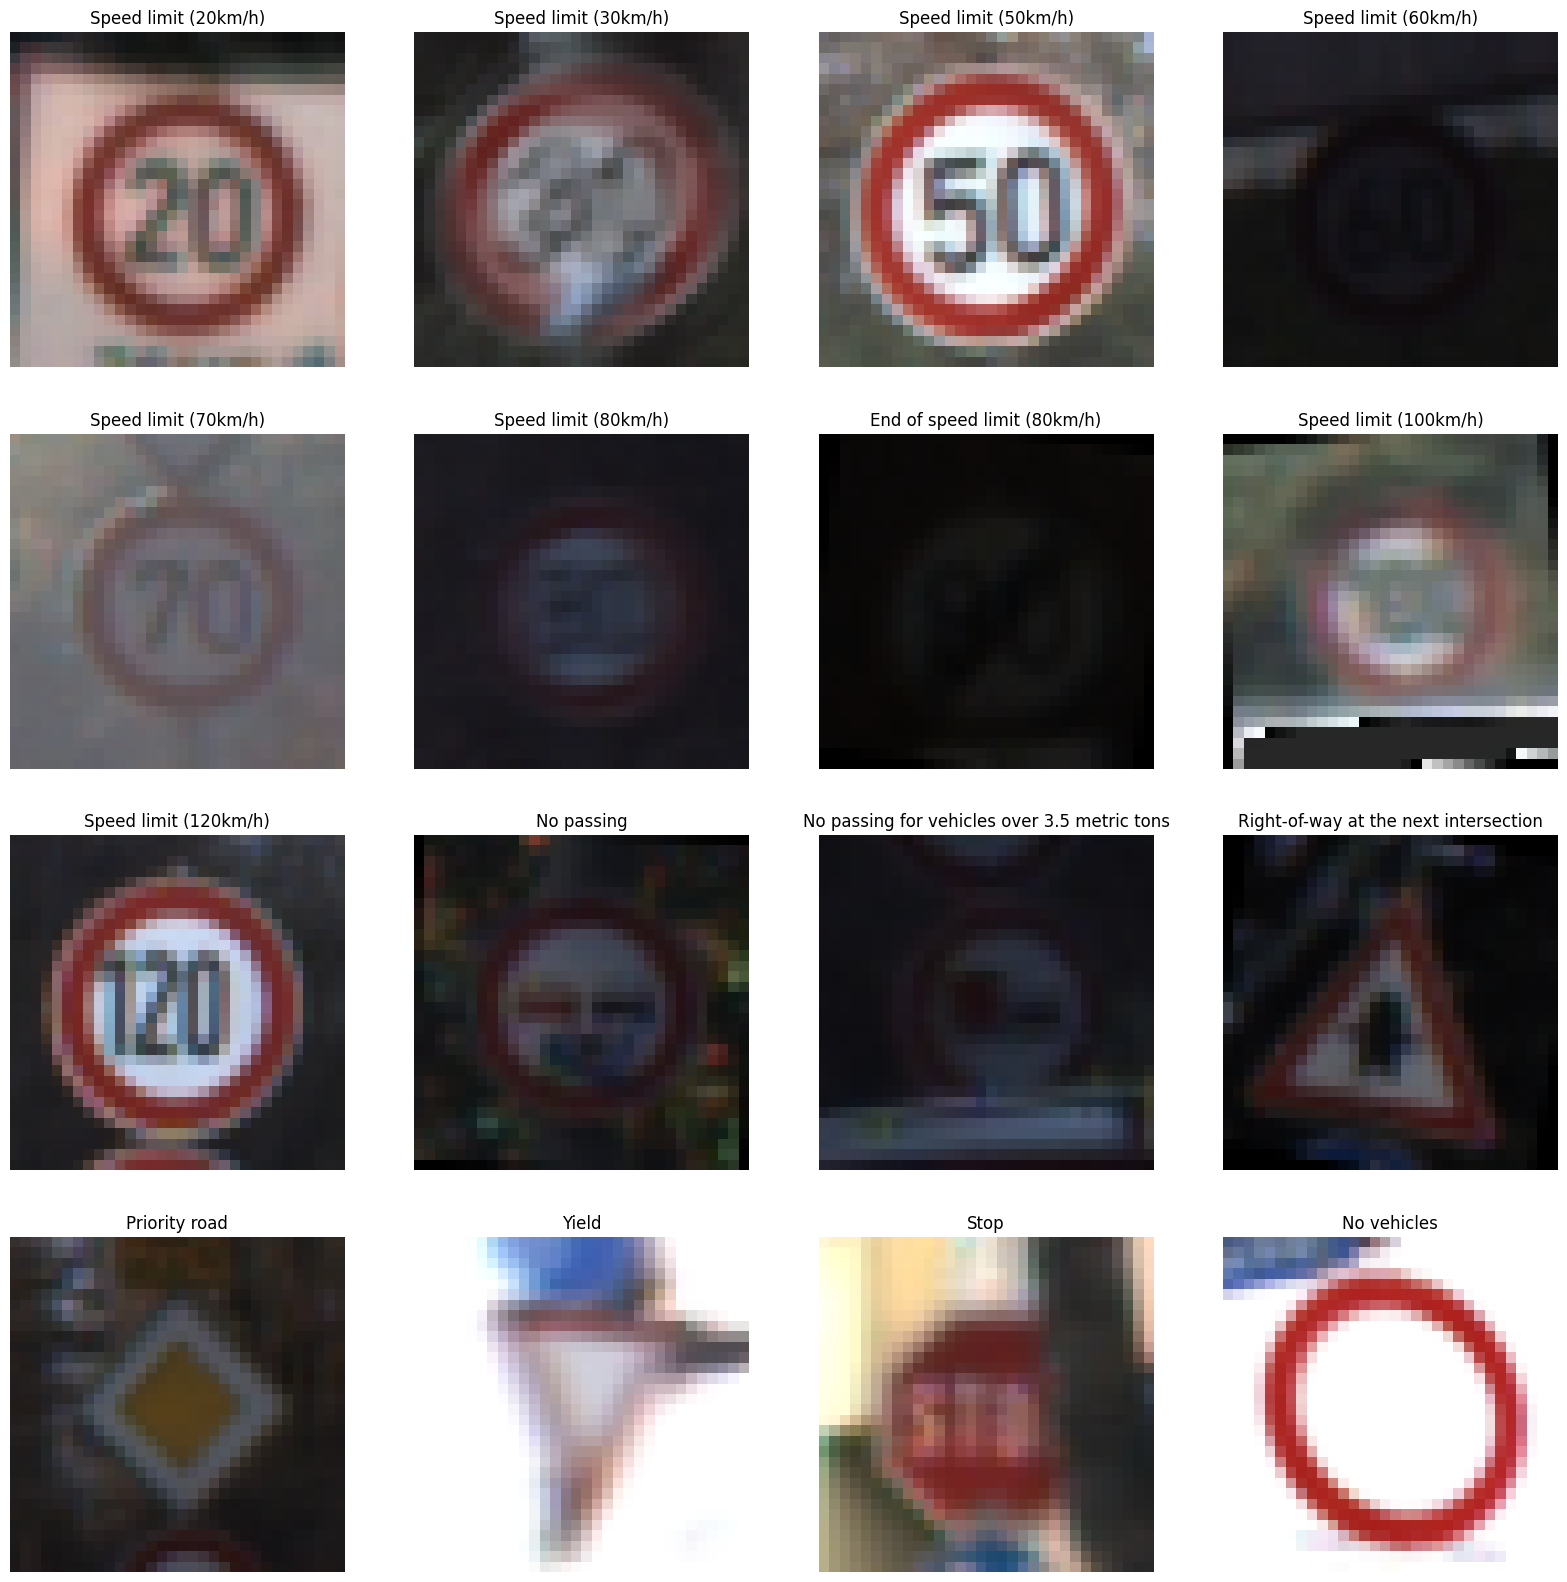

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
x = df_0["x_train"]
y = df_0["y_train"]

index = 0
for label in df_0["labels"]:
    img_index = np.where(y == index)[0][1]
    ax = axs[index // 4, index % 4]
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(x[img_index].transpose(1, 2, 0))
    index += 1

plt.tight_layout()
plt.show()


***let's plot some examples of the pictures in df_8***

IndexError: index 4 is out of bounds for axis 0 with size 4

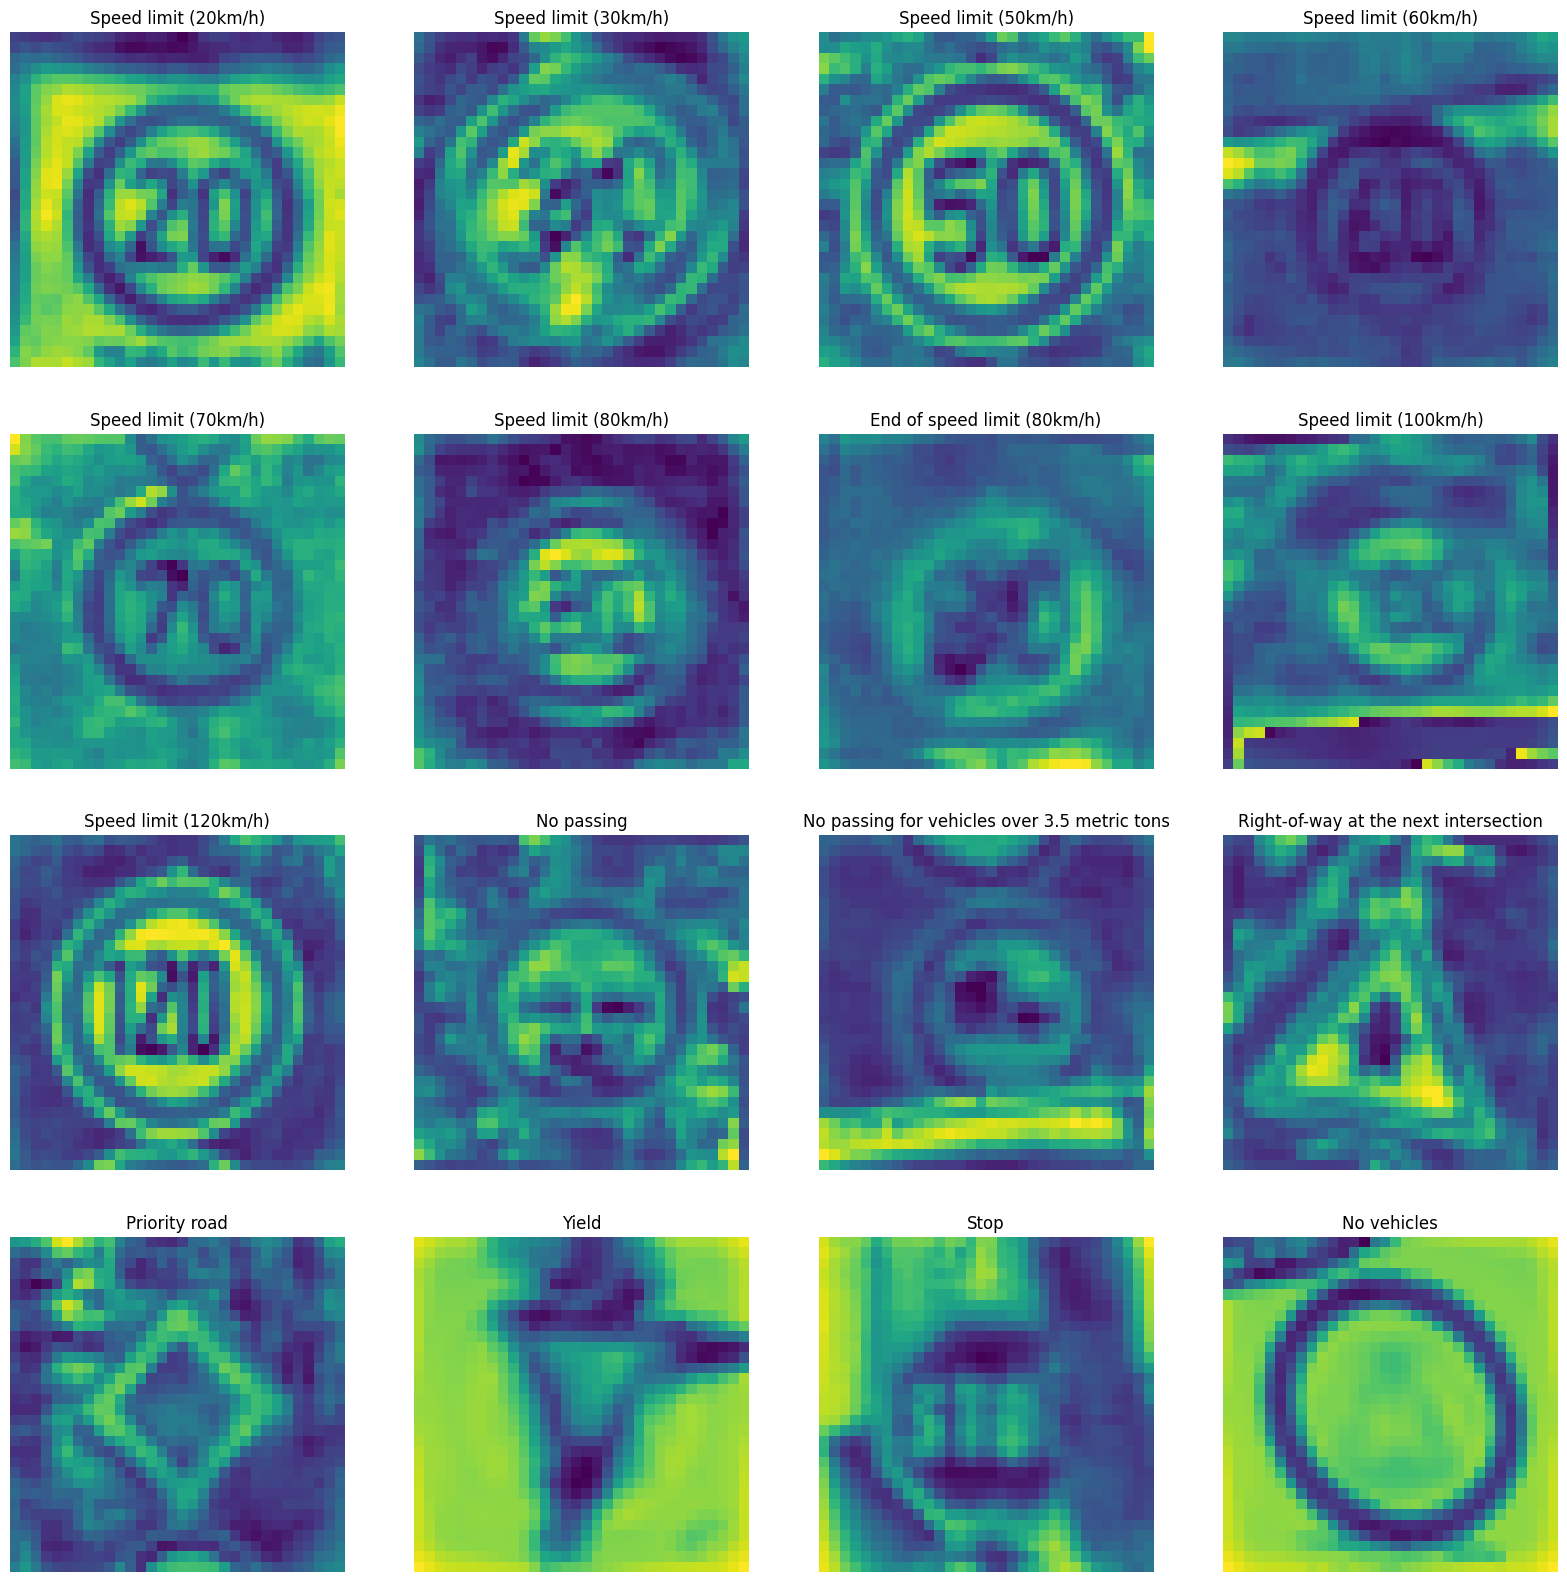

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
x = df_8["x_train"]
y = df_8["y_train"]

index = 0
for label in df_8["labels"]:
    img_index = np.where(y == index)[0][1]
    ax = axs[index // 4, index % 4]
    ax.set_title(label)
    ax.axis('off')
    ax.imshow(x[img_index].transpose(1, 2, 0))
    index += 1

plt.tight_layout()
plt.show()

***Turn the catagorical variables into dummies and then convert the dataframe to numpy array***

In [ ]:
df_0["y_train"] = pd.get_dummies(df_0["y_train"]).to_numpy()
df_0["y_validation"] = pd.get_dummies(df_0["y_validation"]).to_numpy()
df_0["y_test"] = pd.get_dummies(df_0["y_test"]).to_numpy()

***Convert the numpy arrays into pytorch Tensors***

In [ ]:
X_train =  torch.from_numpy( df_0["x_train"] ).type(torch.float32)
y_train = torch.from_numpy( df_0["y_train"] ).type(torch.float32)
X_val = torch.from_numpy( df_0["x_validation"] ).type(torch.float32)
y_val = torch.from_numpy( df_0["y_validation"] ).type(torch.float32)
X_test = torch.from_numpy( df_0["x_test"] ).type(torch.float32)
y_test = torch.from_numpy( df_0["y_test"] ).type(torch.float32)

In [ ]:
training_dataset = torch.utils.data.TensorDataset(X_train, y_train)
training_dataloader = DataLoader(training_dataset, batch_size=1024, shuffle=True)

test_val = torch.utils.data.TensorDataset(X_val, y_val)

***Define the model***

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 128, 3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(128 * 8 * 8, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 43)
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          36,992
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
           Flatten-9                 [-1, 8192]               0
           Linear-10                  [-1, 256]       2,097,408
      BatchNorm1d-11                  [-1, 256]             512
             ReLU-12                  [-1, 256]               0
          Dropout-13                  [-1, 256]               0
           Linear-14                   

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_history = []
val_loss_history = []

epochs = 50

# Training and Evaluating
for epoch in range(epochs):
    loss_batch = []
    acc_batch = []
    for idx, (x, y) in enumerate(training_dataloader):

        model.train()
        # Forward passing
        y_pred = model(x)

        # Loss & Accuracy
        loss = loss_fn(y_pred, y)
        acc = Accuracy(task='multiclass', num_classes=43)(y_pred.argmax(axis=1), y.argmax(axis=1))

        # Optimizer Zero Grad
        optimizer.zero_grad()

        # Back Propagation
        loss.backward()

        # Optimizer's Step
        optimizer.step()


        loss_batch.append(float(loss))
        acc_batch.append(float(acc))




    model.eval()
    with torch.inference_mode():
        # Forward pass
        val_pred = model(X_val)

        # Calculating loss/accuracy
        val_loss = loss_fn(val_pred, y_val)
        val_acc = Accuracy(task='multiclass', num_classes=43)(val_pred.argmax(axis=1), y_val.argmax(axis=1))

        # Caulculating mean loss/accuracy in the batch
        mean_loss_batch = sum(loss_batch) / len(loss_batch)
        mean_acc_batch = sum(acc_batch) / len(acc_batch)

    loss_history.append(mean_loss_batch)
    val_loss_history.append(float(val_loss))

    print(f"Epoch: {epoch} | Loss: {mean_loss_batch:.5f}, Accuracy: {mean_acc_batch*100:.2f}% | Val loss: {val_loss:.5f}, Val acc: {val_acc*100:.2f}%")

Epoch: 0 | Loss: 1.08842, Accuracy: 81.16% | Val loss: 0.40652, Val acc: 94.06%
Epoch: 1 | Loss: 0.15316, Accuracy: 98.40% | Val loss: 0.25180, Val acc: 94.92%
Epoch: 2 | Loss: 0.06032, Accuracy: 99.49% | Val loss: 0.21981, Val acc: 95.10%
Epoch: 3 | Loss: 0.03448, Accuracy: 99.73% | Val loss: 0.20660, Val acc: 95.58%
Epoch: 4 | Loss: 0.02503, Accuracy: 99.83% | Val loss: 0.18995, Val acc: 95.60%
Epoch: 5 | Loss: 0.01826, Accuracy: 99.88% | Val loss: 0.20168, Val acc: 95.31%
Epoch: 6 | Loss: 0.01830, Accuracy: 99.86% | Val loss: 0.18789, Val acc: 95.24%
Epoch: 7 | Loss: 0.01893, Accuracy: 99.85% | Val loss: 0.21940, Val acc: 94.97%
Epoch: 8 | Loss: 0.01355, Accuracy: 99.89% | Val loss: 0.18821, Val acc: 95.80%
Epoch: 9 | Loss: 0.01172, Accuracy: 99.91% | Val loss: 0.20374, Val acc: 95.26%
Epoch: 10 | Loss: 0.01199, Accuracy: 99.90% | Val loss: 0.20161, Val acc: 95.06%
Epoch: 11 | Loss: 0.01353, Accuracy: 99.88% | Val loss: 0.17452, Val acc: 95.71%
Epoch: 12 | Loss: 0.01459, Accuracy: 9

***Get the test accuracy***

In [ ]:
test_pred = model(X_test)

# 2. Caculate loss/accuracy
test_loss = loss_fn(test_pred, y_test)
test_acc = Accuracy(task='multiclass', num_classes=43)(y_test.argmax(axis=1), test_pred.argmax(axis=1))

print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%")

Test loss: 0.16583, Test acc: 95.91%


Plot the value_loss_history and the loss_history

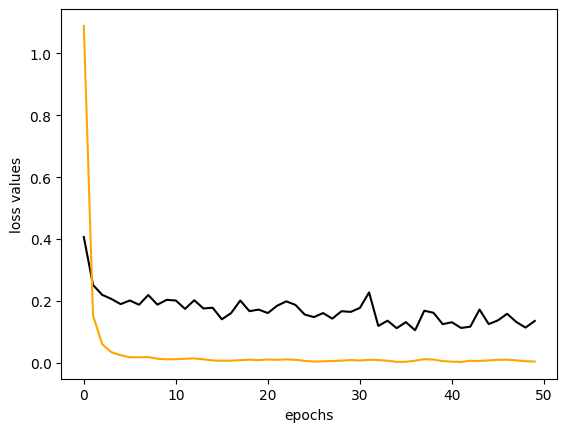

In [ ]:
plt.plot(val_loss_history, color = 'black')
plt.plot(loss_history, color='orange')
plt.xlabel("epochs")
plt.ylabel("loss values")
plt.show()

Repeat the process above for the df_8

In [ ]:
df_8["y_train"] = pd.get_dummies(df_8["y_train"]).to_numpy()
df_8["y_validation"] = pd.get_dummies(df_8["y_validation"]).to_numpy()
df_8["y_test"] = pd.get_dummies(df_8["y_test"]).to_numpy()

In [ ]:
X_train =  torch.from_numpy( df_8["x_train"] ).type(torch.float32)
y_train = torch.from_numpy( df_8["y_train"] ).type(torch.float32)
X_val = torch.from_numpy( df_8["x_validation"] ).type(torch.float32)
y_val = torch.from_numpy( df_8["y_validation"] ).type(torch.float32)
X_test = torch.from_numpy( df_8["x_test"] ).type(torch.float32)
y_test = torch.from_numpy( df_8["y_test"] ).type(torch.float32)

In [ ]:
train_ds = torch.utils.data.TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=1024, shuffle=True)

test_val = torch.utils.data.TensorDataset(X_val, y_val)

In [ ]:
model1 = nn.Sequential(
    nn.Conv2d(1, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(32, 128, 3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(128 * 8 * 8, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 43)
)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
summary(model1, (1, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             320
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         MaxPool2d-4           [-1, 32, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          36,992
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
           Flatten-9                 [-1, 8192]               0
           Linear-10                  [-1, 256]       2,097,408
      BatchNorm1d-11                  [-1, 256]             512
             ReLU-12                  [-1, 256]               0
          Dropout-13                  [-1, 256]               0
           Linear-14                   

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay=0.0001)
loss_history = []
val_loss_history = []

epochs = 50

# Training and Evaluating
for epoch in range(epochs):
    loss_batch = []
    acc_batch = []
    for idx, (x, y) in enumerate(train_dl):

        model1.train()
        # Forward pass
        y_pred = model1(x)

        # Loss & accuracy
        loss = loss_fn(y_pred, y)
        acc = Accuracy(task='multiclass', num_classes=43)(y_pred.argmax(axis=1), y.argmax(axis=1))

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backwards
        loss.backward()

        # Optimizer step
        optimizer.step()


        loss_batch.append(float(loss))
        acc_batch.append(float(acc))




    model1.eval()
    with torch.inference_mode():
        # Forward pass
        val_pred = model1(X_val)

        # Calculate loss/accuracy
        val_loss = loss_fn(val_pred, y_val)
        val_acc = Accuracy(task='multiclass', num_classes=43)(val_pred.argmax(axis=1), y_val.argmax(axis=1))

        # Caulculating mean loss/accuracy in the batch
        mean_loss_batch = sum(loss_batch) / len(loss_batch)
        mean_acc_batch = sum(acc_batch) / len(acc_batch)

    loss_history.append(mean_loss_batch)
    val_loss_history.append(float(test_loss))
    print(f"Epoch: {epoch} | Loss: {mean_loss_batch:.5f}, Accuracy: {mean_acc_batch*100:.2f}% | Val loss: {val_loss:.5f}, Val acc: {val_acc*100:.2f}%")

Epoch: 0 | Loss: 0.74996, Accuracy: 89.14% | Val loss: 0.22541, Val acc: 96.78%
Epoch: 1 | Loss: 0.08138, Accuracy: 99.23% | Val loss: 0.12448, Val acc: 97.23%
Epoch: 2 | Loss: 0.03172, Accuracy: 99.77% | Val loss: 0.10112, Val acc: 97.91%
Epoch: 3 | Loss: 0.01645, Accuracy: 99.92% | Val loss: 0.08449, Val acc: 98.32%
Epoch: 4 | Loss: 0.01038, Accuracy: 99.96% | Val loss: 0.07729, Val acc: 98.19%
Epoch: 5 | Loss: 0.00700, Accuracy: 99.99% | Val loss: 0.07577, Val acc: 98.30%
Epoch: 6 | Loss: 0.00575, Accuracy: 99.99% | Val loss: 0.07467, Val acc: 98.44%
Epoch: 7 | Loss: 0.00472, Accuracy: 99.99% | Val loss: 0.06600, Val acc: 98.44%
Epoch: 8 | Loss: 0.00437, Accuracy: 99.98% | Val loss: 0.08598, Val acc: 97.76%
Epoch: 9 | Loss: 0.01498, Accuracy: 99.83% | Val loss: 0.11437, Val acc: 97.44%
Epoch: 10 | Loss: 0.01187, Accuracy: 99.90% | Val loss: 0.09135, Val acc: 97.53%
Epoch: 11 | Loss: 0.00674, Accuracy: 99.96% | Val loss: 0.08292, Val acc: 97.71%
Epoch: 12 | Loss: 0.00400, Accuracy: 9

In [ ]:
test_pred = model1(X_test)

# 2. Caculate loss/accuracy
test_loss = loss_fn(test_pred, y_test)
test_acc = Accuracy(task='multiclass', num_classes=43)(y_test.argmax(axis=1), test_pred.argmax(axis=1))

print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc*100:.2f}%")

Test loss: 0.09222, Test acc: 97.61%


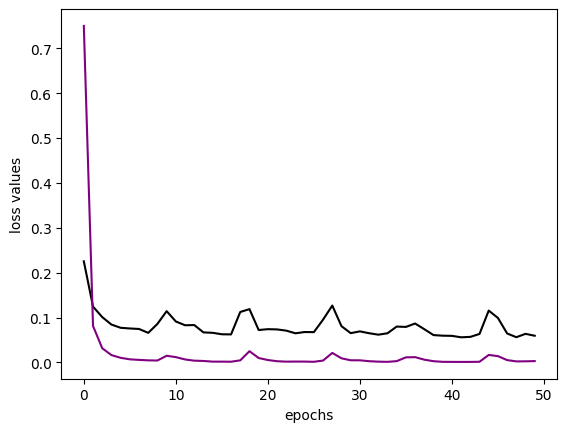

In [ ]:
plt.plot(val_loss_history, color = 'black')
plt.plot(loss_history, color='purple')
plt.xlabel("epochs")
plt.ylabel("loss values")
plt.show()